## <font color="purple">20-NuclearReactions </font> (template)

In [2]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. At home: pp vs CNO rates

> **TODO**
> 1. Make a plot of $\log(\epsilon)$ as a function of $\log(T)$ for the PP-I chain and the CNO cycle, based on the expression given in class (from Kip 18.5.1). Use the temperature range already given in the code below.
>
> 2. In both cases (PP-I and CNO), by how much does the $\epsilon$ changes for a change of temperature of one order of magnitude?
>
>3. If you were to reproduce $\epsilon$ in the range of temperature below by a power law of the form $\epsilon \propto T^\nu$, what would the index $\nu$ of the power law be? (Graph a curve to find your answer.)

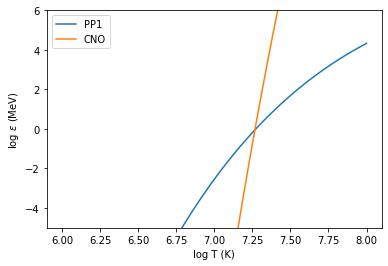

In [7]:
fig, ax = plt.subplots(1,1)
ax.set_ylim(-5,6)

logT = np.linspace(6,8,50)

T6 = (10**logT)/1e6

rho = 1

Xh = 1
g_pp = (1+0.0123*T6**(1/3) + 0.0109*T6**(2/3) + 0.0009*T6)
eps_pp = 2.38e6 * Xh**2 * rho * T6**(-2/3) * np.exp(-33.8/T6**(1/3))

Xcno = 0.01
g_cno = (1+0.0027*T6**(1/3) - 0.00778*T6**(2/3) - 0.000149*T6)
eps_cno = 8.6e27 * Xh*Xcno * rho * T6**(-2/3) * np.exp(-152.83/T6**(1/3))
#########################
# At home
ax.plot(logT, np.log(eps_pp), label = 'PP1')
ax.plot(logT, np.log(eps_cno),label = 'CNO')
ax.set_xlabel('log T (K)')
ax.set_ylabel(r'log $\epsilon$ (MeV)')
ax.legend(loc=0)

> **TODO**: Write a caption for your graph, and answer the questions asked.

## 2. Let's look at the energy generation in our MESA models



### Reading in the models

First, use the cell below to read in the two MESA models from the convection notebook for the Sun (in variable `Msun`) and for a 10 $M_\odot$ star (in variable `M10`). 

In [9]:
def read_model(file):

    return np.genfromtxt(file, skip_header=5, names=True)

Msun = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data')
M10 = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-M10-profile8.data')

### 1. In class: we will look at the energy generation in the Solar model.

In MESA, the column named `eps_nuc` gives the total power per gram coming from all of the nuclear reactions. The columns `pp` and `cno` give the power/g coming from the PP (I, II, and III) chains and the CNO cycle, respectively. 

We will make a gapph of $\epsilon_\mathrm{nuc}$, $\epsilon_\mathrm{pp}$ and $\epsilon_\mathrm{cno}$ as a function of radius. 

### At home:

> **TODO** 
>
> 1. Make a similar plot for the 10$M_\odot$ model. In the interpretation box below, comment on the similarities/differences between the two models.
>
> 2. Use the analytical expression for $\epsilon_\mathrm{pp-1}$ and $\epsilon_\mathrm{cno}$ from Part 1 to calculate your expected values for $\epsilon_\mathrm{pp-1}$ and $\epsilon_\mathrm{cno}$ in both models, and add these curves to your plots. In the MESA model, you will some useful columns such as:
>    * 'logRho' for the logarithm10 of the density in g/cm$^2$
>    * 'logT' for the logarithm10 of the temperature in K
>    * 'h1' for the mass fraction of hydrogen
>    * 'c12', 'n14', 'o16','o18' for the mass fraction of important isotopes of carbon, nitrogen, and oxygen.
>
> 3. In the interpretation box below, compare your calculation in #2 to the real $\epsilon$s in the models. If there are any differences, comment on what could explain these discrepencies. 

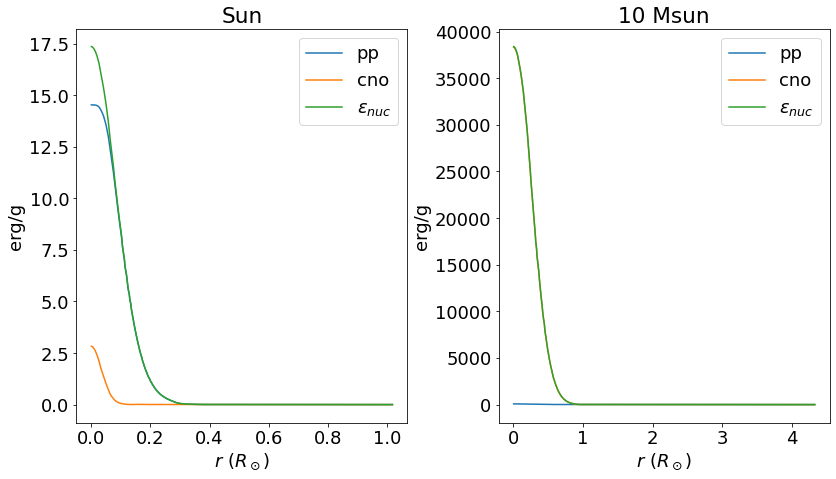

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,7))

ax[0].set_title('Sun')
ax[1].set_title('10 Msun')

ax[0].set_xlabel('$r$ ($R_\odot$)')
ax[1].set_xlabel('$r$ ($R_\odot$)')

ax[0].set_ylabel('erg/g')
ax[1].set_ylabel('erg/g')

plt.rcParams.update({'font.size': 18})
plt.tight_layout()


#########################
# In class
ax[0].plot(10**Msun['logR'], Msun['pp'], label='pp')
ax[0].plot(10**Msun['logR'], Msun['cno'], label='cno')
ax[0].plot(10**Msun['logR'], Msun['eps_nuc'], label=r'$\epsilon_{nuc}$')
ax[0].legend(loc=1)

#########################
# At home
ax[1].plot(10**M10['logR'], M10['pp'], label='pp')
ax[1].plot(10**M10['logR'], M10['cno'], label='cno')
ax[1].plot(10**M10['logR'], M10['eps_nuc'], label=r'$\epsilon_{nuc}$')
ax[1].legend(loc=1)



> **TODO** Write a caption for your graph, and answer the questions asked. 